In [20]:
%load_ext autoreload
%autoreload 2


import mahotas as mh
import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

import mlproof as mlp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
image, prob, mask, gold, rhoana = mlp.Util.read_section('/home/d/data/cylinder/',200)

Loading z00000200.png


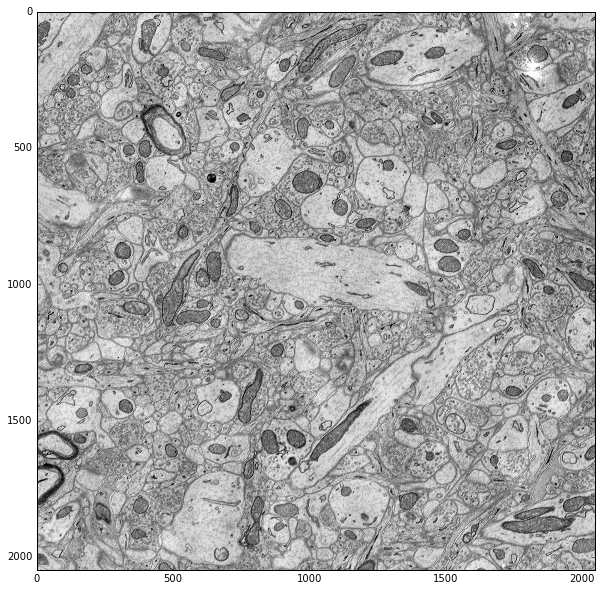

In [3]:
mlp.Util.view(image, color=False, large=True)

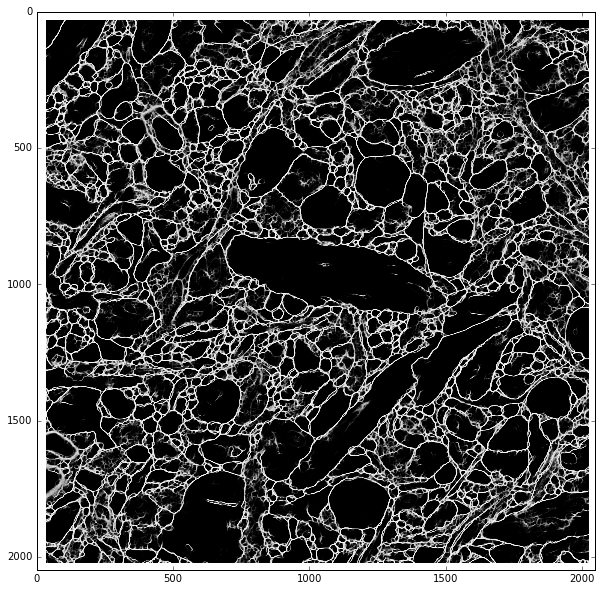

In [4]:
mlp.Util.view(prob, color=False, large=True)

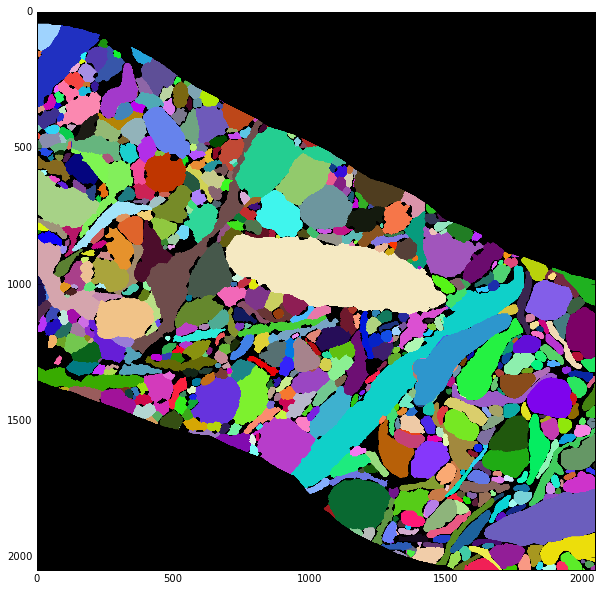

In [5]:
mlp.Util.view(gold, large=True)

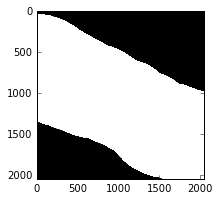

In [6]:
mlp.Util.view(mask, color=False)

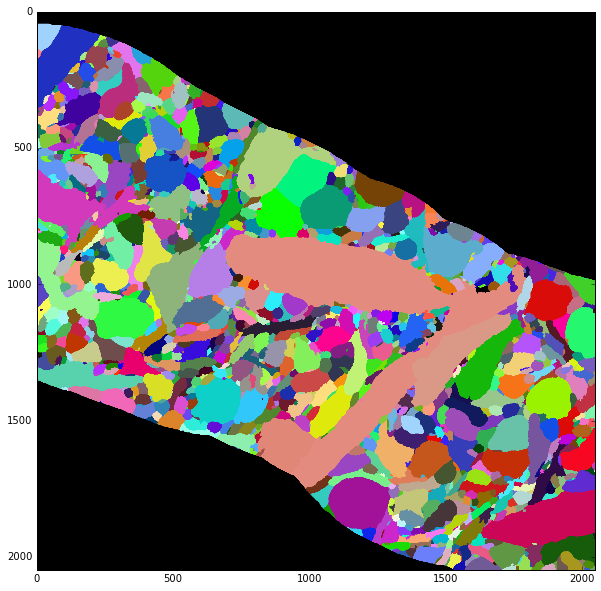

In [7]:
mlp.Util.view(rhoana, large=True)

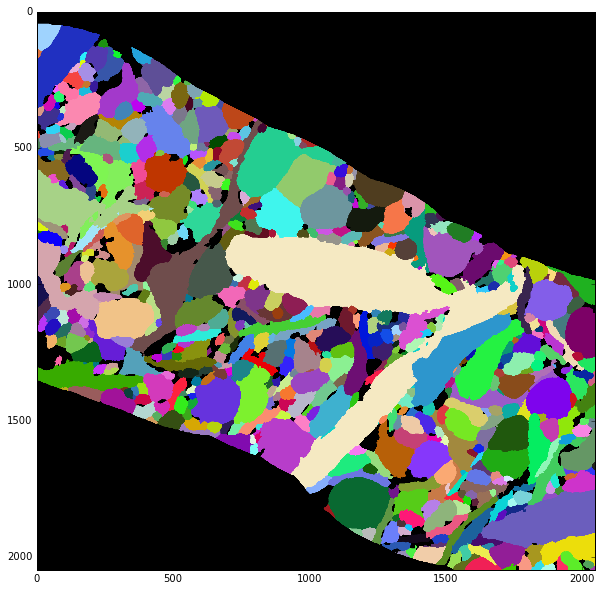

In [8]:
fixed = mlp.Util.propagate_max_overlap(rhoana, gold)
mlp.Util.view(fixed, large=True)

In [9]:
print 'before', len(mlp.Util.get_histogram(rhoana))
print 'after', len(mlp.Util.get_histogram(fixed))

before 1997
after 956


In [102]:
def get_bad_border(mask, gold, segmentation):

    # grab the mask border
    mask_borders = mh.labeled.borders(mask)
    
    # fill segmentation using max overlap and relabel it
    fixed = mlp.Util.propagate_max_overlap(segmentation, gold)
    fixed = mlp.Util.relabel(fixed)

    # now remove parts which are not in the fixed segmentation
    segmentation[fixed==0] = 0
    
    # grab borders of segmentation and fixed
    segmentation_borders = mh.labeled.borders(segmentation)
    fixed_borders = mh.labeled.borders(fixed)
    fixed_borders[mask_borders == 1] = 0
    
    
    bad_borders = np.array(segmentation_borders)
    bad_borders[fixed_borders == 1] = 0
    bad_borders[mask_borders == 1] = 0
    
    
    
#     bad_borders = np.logical_xor(segmentation_borders, fixed_borders)
#     fixed_borders = np.logical_xor(fixed_borders, mask_borders)
    
    return segmentation_borders, fixed_borders, bad_borders, mask_borders

In [103]:
seg_borders, fixed_borders, bad_borders, mask_borders = get_bad_border(mask, gold, rhoana)

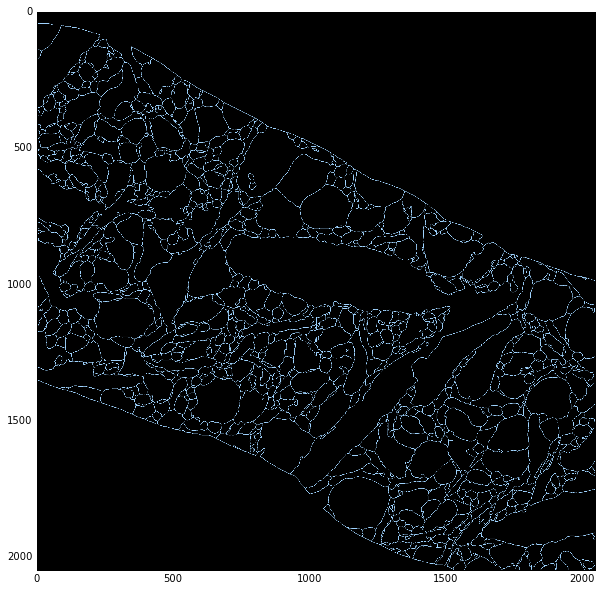

In [104]:
mlp.Util.view(seg_borders, large=True)

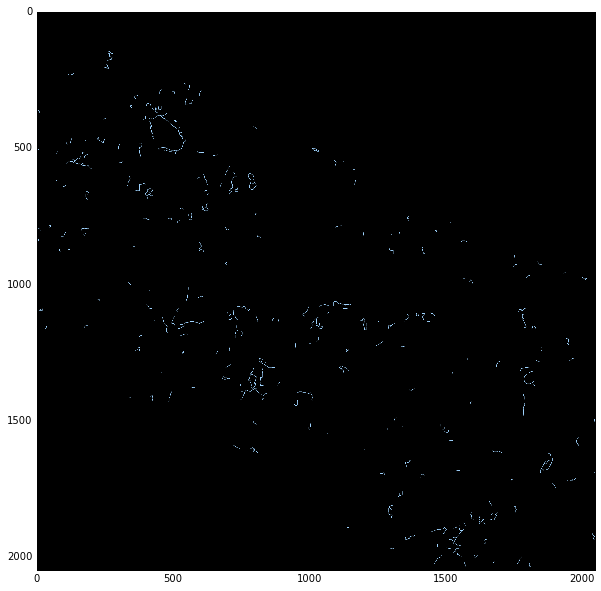

In [105]:
mlp.Util.view(bad_borders, large=True)

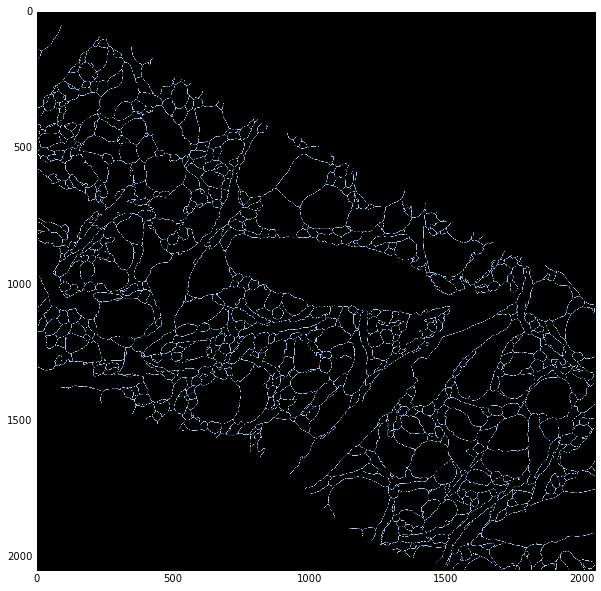

In [106]:
mlp.Util.view(fixed_borders, large=True)

In [115]:
import time
t0 = time.time()
e_p, p = mlp.Patch.patchify_maxoverlap(image, prob, mask, rhoana, gold, sample_rate=1)
print time.time()-t0, 'seconds'

628.605624199 seconds


In [113]:
mlp.Patch

mlproof.patch.Patch

In [116]:
len(p)

1288

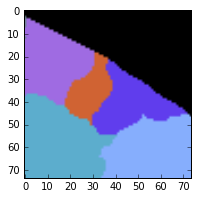

In [50]:
mlp.Util.view(rhoana[802:876,1600:1674])

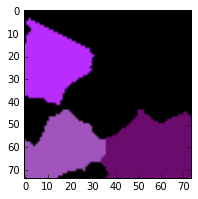

In [53]:
mlp.Util.view(gold[802:876,1600:1674])

In [73]:
rhoana_snip = rhoana[802:876,1600:1674]

In [74]:
gold_snip = gold[802:876,1600:1674]

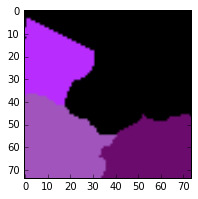

In [75]:
fixed_snip = mlp.Util.propagate_max_overlap(rhoana_snip, gold_snip)
mlp.Util.view(fixed_snip)

In [ ]:
get_bad_border()

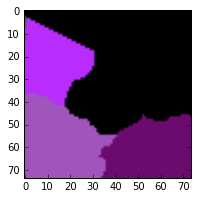

In [54]:
mlp.Util.view(fixed[802:876,1600:1674])

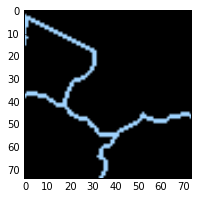

In [107]:
mlp.Util.view(seg_borders[802:876,1600:1674])

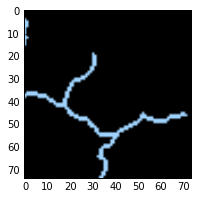

In [108]:
mlp.Util.view(fixed_borders[802:876,1600:1674])

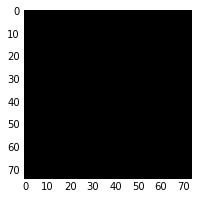

In [110]:
mlp.Util.view(bad_borders[802:876,1600:1674])

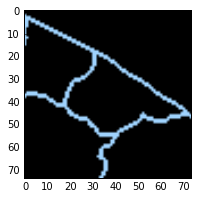

In [98]:
mlp.Util.view(mask_borders[802:876,1600:1674] + fixed_borders[802:876,1600:1674])

/home/d/nolearn/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.
  if __name__ == '__main__':


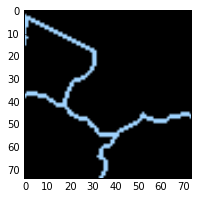

In [100]:
mlp.Util.view(fixed_borders[802:876,1600:1674] - mask_borders[802:876,1600:1674])

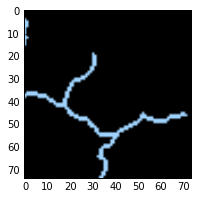

In [101]:
fff = fixed_borders[802:876,1600:1674]
fff[mask_borders[802:876,1600:1674] == 1] =0
mlp.Util.view(fff)

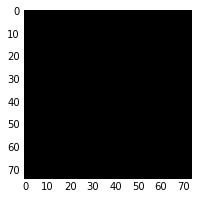

In [97]:
mlp.Util.view(bad_borders[802:876,1600:1674])

In [77]:
seg_borders, fixed_borders, bad_borders = get_bad_border(mask, gold, rhoana)

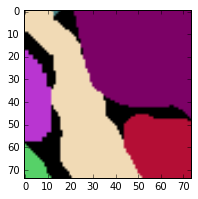

In [125]:
mlp.Util.view(gold[1202:1276, 1917:1991])

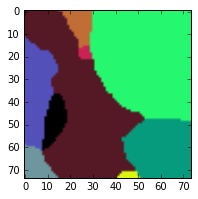

In [126]:
mlp.Util.view(rhoana[1202:1276, 1917:1991])

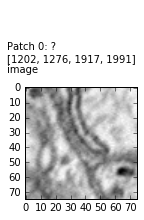

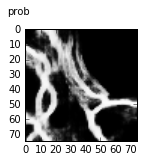

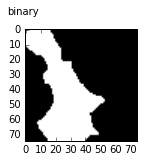

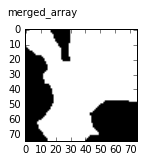

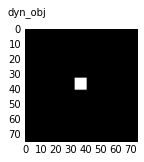

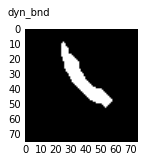

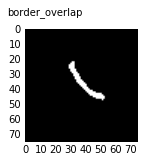

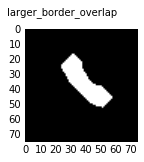

In [124]:
show(p[100])

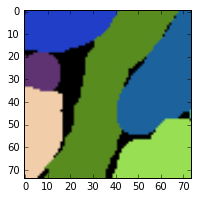

In [130]:
mlp.Util.view(gold[1931:2005, 1473:1547])

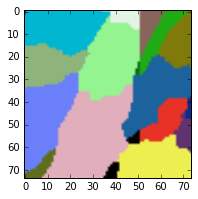

In [129]:
mlp.Util.view(rhoana[1931:2005, 1473:1547])

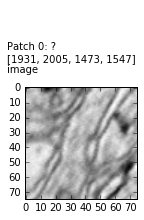

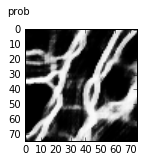

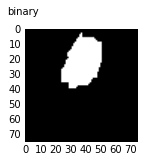

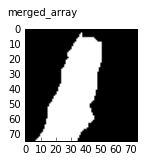

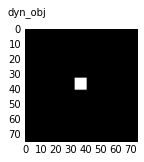

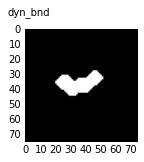

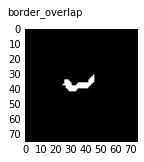

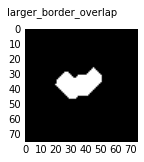

In [128]:
show(e_p[200])

In [43]:
def show(patches, cnn=None, pred_threshold=1.):

    if type(patches) != type(list()):
      patches = [patches]

    for i,patch in enumerate(patches):

      if cnn:
        pred = cnn.test_patch(patch)
        if pred < pred_threshold:
          continue

      else:
        pred = '?'

      fig = plt.figure(figsize=(2,2))

      text = '\n\n\nPatch '+str(i) + ': ' + str(pred)
      if 'bbox' in patch:
        text += '\n'+str(patch['bbox'])
      text += '\nimage'

      fig.text(0,1,text)
      plt.imshow(patch['image'], cmap='gray')
      fig = plt.figure(figsize=(2,2))
      fig.text(0,1,'prob')
      plt.imshow(patch['prob'], cmap='gray')
      fig = plt.figure(figsize=(2,2))
      fig.text(0,1,'binary')
      plt.imshow(patch['binary'], cmap='gray')
      if 'input_binary1' in patch:
        fig = plt.figure(figsize=(2,2))
        fig.text(0,1,'input_binary1')
        plt.imshow(patch['input_binary1'], cmap='gray')
      if 'input_binary2' in patch:
        fig = plt.figure(figsize=(2,2))
        fig.text(0,1,'input_binary2')
        plt.imshow(patch['input_binary2'], cmap='gray')
      fig = plt.figure(figsize=(2,2))
      fig.text(0,1,'merged_array')
      plt.imshow(patch['merged_array'], cmap='gray')
      fig = plt.figure(figsize=(2,2))
      fig.text(0,1,'dyn_obj')
      plt.imshow(patch['dyn_obj'], cmap='gray')         
      fig = plt.figure(figsize=(2,2))
      fig.text(0,1,'dyn_bnd')
      plt.imshow(patch['dyn_bnd'], cmap='gray')      
      fig = plt.figure(figsize=(2,2))
      fig.text(0,1,'border_overlap')
      plt.imshow(patch['border_overlap'], cmap='gray')
      fig = plt.figure(figsize=(2,2))
      fig.text(0,1,'larger_border_overlap')
      plt.imshow(patch['larger_border_overlap'], cmap='gray')
